# Projections de la consommation culturelle patrimoniale

Auteur : [Maximo Rose](https://maximorose.eu/)

Licence : [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

-----------------------------------------------------------

## Introduction
On part de la fin de l'enquête du DEPS (le rapport publié et annoté par mes soins est accessible dans le repo. L'original est sur le site du ministère de la culture, [ici](https://www.culture.gouv.fr/Media/Medias-creation-rapide/CE-2020-2_Cinquante-ans-de-pratiques-culturelles-en-France.pdf2)) pour estimer comment évolue, au fil des ans, la part de français.e.s qui visitent des expositions.

## Etat des lieux

Dans cette partie, on importe simplement les données disponibles dans le rapport et on trace le graph lié au tableau page 76.

Celui là :

![Tableau issu de la page 76 du rapport du DEPS](https://maximorose.eu/Ressources/Tableau_des_univers.png)

In [1]:
import pandas as pd
filename = 'Univers_historique.csv'
dt_univers = pd.read_csv(filename)

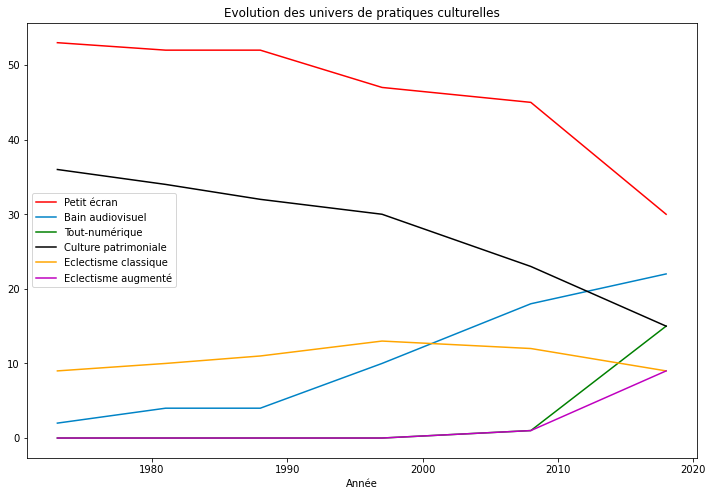

In [2]:
import matplotlib.pyplot as plt

# On initie les dataframes des univers
petit_ecran = dt_univers[dt_univers['Univers'] == 'Petit écran']
bain_audiovisuel = dt_univers[dt_univers['Univers'] == 'Bain audiovisuel']
tout_numerique = dt_univers[dt_univers['Univers'] == 'Tout-numérique']
culture_patrimoniale = dt_univers[dt_univers['Univers'] == 'Culture patrimoniale']
eclectisme_classique = dt_univers[dt_univers['Univers'] == 'Eclectisme classique']
eclectisme_augmente = dt_univers[dt_univers['Univers'] == 'Eclectisme augmenté']

# On trace leurs courbes
fig , axs = plt.subplots(figsize=(12,8))
plt.title("Evolution des univers de pratiques culturelles")
petit_ecran.plot(x='Année', y='Part', ax = axs, color = 'red', label = 'Petit écran' )
bain_audiovisuel.plot(x='Année', y='Part', ax = axs, color = '#0083c6', label = 'Bain audiovisuel')
tout_numerique.plot(x='Année', y='Part', ax = axs, color = 'green', label = 'Tout-numérique')
culture_patrimoniale.plot(x='Année', y='Part', ax = axs, color = 'black', label = 'Culture patrimoniale')
eclectisme_classique.plot(x='Année', y='Part', ax = axs, color = 'orange', label = 'Eclectisme classique')
eclectisme_augmente.plot(x='Année', y='Part', ax = axs, color = 'm', label = 'Eclectisme augmenté')
plt.show()

# Approche simpliste

## Part des français qui visitent potentiellement des expositions

Le rapport positionne les visiteurs d'expositions dans les univers : 
- Culture patrimoniale
- Eclectisme classique
- Eclectisme augmenté

Sans considérer la part des personnes au sein de ces univers qui déclare visiter des musées (seul 73% des membres de l'éclectisme augmenté déclarent avoir visité une exposition en 2018, contre 90% des membres de l'éclectisme classique. Ainsi l'accroissement de l'univers de l'éclectisme augmenté pourrait ne pas compenser la perte de l'éclectisme classique).
On peut considérer comme une approximation positive de simplement sommer les populations de ces univers, pour évaluer la part de prospects à laquelle les insitutions culturelles ont pu prétendre au cours des 5 dernières décennies.

(les couleurs c'est juste pour que ça ressemble à un horizon. L'important, c'est la zone verte : la terre <3.)

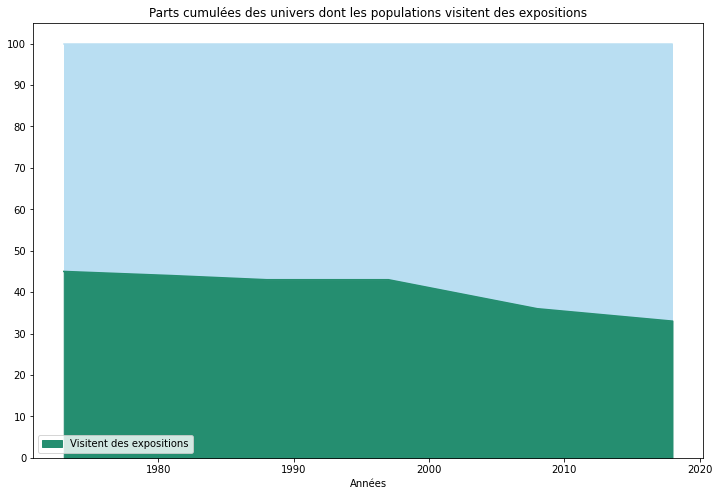

In [3]:
import numpy as np

univers_visiteurs_de_musee = culture_patrimoniale.append(eclectisme_classique).append(eclectisme_augmente)
univers_non_visiteurs_de_musee = petit_ecran.append(bain_audiovisuel).append(tout_numerique)
annees = [1973, 1981, 1988, 1997, 2008, 2018]


somme_visiteur_de_musee_par_annee = []
somme_non_visiteur_de_musee_par_annee = []
for i in range(len(annees)) :
    subdtf_v = univers_visiteurs_de_musee[univers_visiteurs_de_musee['Année'] == annees[i]]
    subdtf_nv = univers_non_visiteurs_de_musee[univers_non_visiteurs_de_musee['Année'] == annees[i]]
    somme_visiteur_de_musee = subdtf_v['Part'].sum()
    somme_non_visiteur_de_musee = subdtf_nv['Part'].sum()
    somme_visiteur_de_musee_par_annee.append(somme_visiteur_de_musee)
    somme_non_visiteur_de_musee_par_annee.append(somme_non_visiteur_de_musee)

d_visiteurs = {'Années':annees,'Parts cumulées':somme_visiteur_de_musee_par_annee}
df_visiteurs = pd.DataFrame(d_visiteurs)

d_non_visiteurs = {'Années':annees,'Parts cumulées':[100, 100, 100, 100, 100, 100]}
df_non_visiteurs = pd.DataFrame(d_non_visiteurs)


fig , axs = plt.subplots(figsize=(12,8))
plt.title('Parts cumulées des univers dont les populations visitent des expositions')
df_non_visiteurs.plot.area(x='Années', y='Parts cumulées', ax = axs, color = '#b9def2', legend = False)
df_visiteurs.plot.area(x='Années', y='Parts cumulées', ax = axs, color = '#258e70', label = 'Visitent des expositions')
plt.yticks(np.arange(110, step=10))
plt.show()

In [4]:
print("Part de visiteurs potentiels de musée en 1973 : " + str(somme_visiteur_de_musee_par_annee[0])+'%')
print("Part de visiteurs potentiels de musée en 2018 : " + str(somme_visiteur_de_musee_par_annee[-1])+'%')

Part de visiteurs potentiels de musée en 1973 : 45%
Part de visiteurs potentiels de musée en 2018 : 33%


In [5]:
taux_de_perte_de_points = (somme_visiteur_de_musee_par_annee[0] - somme_visiteur_de_musee_par_annee[-1]) / somme_visiteur_de_musee_par_annee[0]
print ("taux de perte = " + str(taux_de_perte_de_points*100) +"%")

taux de perte = 26.666666666666668%


### Bilan

La part de prospect des lieux d'exposition décroît au fil du temps. Elle a perdu 12 points en 50 ans, soit une baisse de plus d'1/4 (26.7%).

La décroissance la plus forte a eu lieu entre 1998 et 2008. Lorsque la bulle internet atteignait son apogée.

## Projection

Considérons maintenant les tendances à la croissance ou à la décroissance de ces univers, pour estimer des projections à venir de leurs parts actuelles.

Imaginons la perspective où l'évolution de 2008 à 2018, largement impactée par le développement de l'industrie numérique, du big data, et des algorithmes prédictifs personnalisés, perdure : les univers en croissance continuent de croitre aux mêmes rythmes, et ceux en décroissance suivent leur pente.

In [6]:
Part2008_petit_ecran = petit_ecran[petit_ecran['Année'] == 2008]['Part'].values[0]
Part2018_petit_ecran = petit_ecran[petit_ecran['Année'] == 2018]['Part'].values[0]
variation_petit_ecran = (Part2018_petit_ecran - Part2008_petit_ecran)/Part2008_petit_ecran
projection_2028_petit_ecran = Part2018_petit_ecran + variation_petit_ecran*Part2018_petit_ecran
print ("Petit écran en 2008 : " + str(Part2008_petit_ecran))
print ("Petit écran en 2018 : " + str(Part2018_petit_ecran))
print("Petit écran en 2028 : " + str(projection_2028_petit_ecran))
print()


Part2008_bain_audiovisuel = bain_audiovisuel[bain_audiovisuel['Année'] == 2008]['Part'].values[0]
Part2018_bain_audiovisuel = bain_audiovisuel[bain_audiovisuel['Année'] == 2018]['Part'].values[0]
variation_bain_audiovisuel = (Part2018_bain_audiovisuel - Part2008_bain_audiovisuel)/Part2008_bain_audiovisuel
projection_2028_bain_audiovisuel = Part2018_bain_audiovisuel + variation_bain_audiovisuel*Part2018_bain_audiovisuel
print ("Bain audiovisuel en 2008 : " + str(Part2008_bain_audiovisuel))
print ("Bain audiovisuel en 2018 : " + str(Part2018_bain_audiovisuel))
print("Bain audiovisuel en 2028 : " + str(projection_2028_bain_audiovisuel))
print()

Part2008_tout_numerique = tout_numerique[tout_numerique['Année'] == 2008]['Part'].values[0]
Part2018_tout_numerique = tout_numerique[tout_numerique['Année'] == 2018]['Part'].values[0]
variation_tout_numerique = (Part2018_tout_numerique - Part2008_tout_numerique)/Part2008_tout_numerique
projection_2028_tout_numerique = Part2018_tout_numerique + variation_tout_numerique*Part2018_tout_numerique
print ("Tout numérique en 2008 : " + str(Part2008_tout_numerique))
print ("Tout numérique en 2018 : " + str(Part2018_tout_numerique))
print("Tout numérique en 2028 : " + str(projection_2028_tout_numerique))
print()


Part2008_culture_patrimoniale = culture_patrimoniale[culture_patrimoniale['Année'] == 2008]['Part'].values[0]
Part2018_culture_patrimoniale = culture_patrimoniale[culture_patrimoniale['Année'] == 2018]['Part'].values[0]
variation_culture_patrimoniale = (Part2018_culture_patrimoniale - Part2008_culture_patrimoniale)/Part2008_culture_patrimoniale
projection_2028_culture_patrimoniale = Part2018_culture_patrimoniale + variation_culture_patrimoniale*Part2018_culture_patrimoniale
print ("Culture Patrimoniale en 2008 : " + str(Part2008_culture_patrimoniale))
print ("Culture Patrimoniale en 2018 : " + str(Part2018_culture_patrimoniale))
print("Culture Patrimoniale en 2028 : " + str(projection_2028_culture_patrimoniale))
print()

Part2008_eclectisme_classique = eclectisme_classique[eclectisme_classique['Année'] == 2008]['Part'].values[0]
Part2018_eclectisme_classique = eclectisme_classique[eclectisme_classique['Année'] == 2018]['Part'].values[0]
variation_eclectisme_classique = (Part2018_eclectisme_classique - Part2008_eclectisme_classique)/Part2008_eclectisme_classique
projection_2028_eclectisme_classique = Part2018_eclectisme_classique + variation_eclectisme_classique*Part2018_eclectisme_classique
print ("Eclectisme classique en 2008 : " + str(Part2008_eclectisme_classique))
print ("Eclectisme classique en 2018 : " + str(Part2018_eclectisme_classique))
print("Eclectisme classique en 2028 : " + str(projection_2028_eclectisme_classique))
print()


Part2008_eclectisme_augmente = eclectisme_augmente[eclectisme_augmente['Année'] == 2008]['Part'].values[0]
Part2018_eclectisme_augmente = eclectisme_augmente[eclectisme_augmente['Année'] == 2018]['Part'].values[0]
variation_eclectisme_augmente = (Part2018_eclectisme_augmente - Part2008_eclectisme_augmente)/Part2008_eclectisme_augmente
projection_2028_eclectisme_augmente = Part2018_eclectisme_augmente + variation_eclectisme_augmente*Part2018_eclectisme_augmente
print ("Eclectisme augmenté en 2008 : " + str(Part2008_eclectisme_augmente))
print ("Eclectisme augmenté en 2018 : " + str(Part2018_eclectisme_augmente))
print("Eclectisme augmenté en 2028 : " + str(projection_2028_eclectisme_augmente))
print()

Petit écran en 2008 : 45
Petit écran en 2018 : 30
Petit écran en 2028 : 20.0

Bain audiovisuel en 2008 : 18
Bain audiovisuel en 2018 : 22
Bain audiovisuel en 2028 : 26.88888888888889

Tout numérique en 2008 : 1
Tout numérique en 2018 : 15
Tout numérique en 2028 : 225.0

Culture Patrimoniale en 2008 : 23
Culture Patrimoniale en 2018 : 15
Culture Patrimoniale en 2028 : 9.782608695652174

Eclectisme classique en 2008 : 12
Eclectisme classique en 2018 : 9
Eclectisme classique en 2028 : 6.75

Eclectisme augmenté en 2008 : 1
Eclectisme augmenté en 2018 : 9
Eclectisme augmenté en 2028 : 81.0



### Problème 

Deux valeurs projetées posent problème : celle du "tout numérique" et celle de "l'éclectisme augmenté". Leur croissance a été si forte entre 2008 et 2018 que si elle perdurait, la part du tout-numérique serait de 225%...

Pour s'offrir une estimation facile, pas trop déconnante, on répartira simplement la part restante des autres univers projetés entre ces deux univers là. Et cette répartition sera fonction de leur rapport actuel.

Comparons donc ces deux univers :

In [7]:
rapport_univers_numerique = Part2018_tout_numerique/Part2018_eclectisme_augmente
print("Rapport entre les parts des univers 'tout-numérique' et 'éclectisme augmentée' = " + str(rapport_univers_numerique))

Rapport entre les parts des univers 'tout-numérique' et 'éclectisme augmentée' 1.6666666666666667


En 2018, la part du "tout-numérique" est 1.67 fois plus grande que celle de l'éclectisme augmenté.

Si ce rapport était maintenu et que ces deux univers se partageaient la part de public restante, une fois otée la part des autres univers à la totalité, on pourrait imaginer les projections suivantes :

In [8]:
reste = 100 - (projection_2028_petit_ecran + projection_2028_bain_audiovisuel + projection_2028_culture_patrimoniale + projection_2028_eclectisme_classique)
# J'ai posé l'équation sur le papier, j'avoue.
Part2028_eclectisme_augmente = reste / (1 + rapport_univers_numerique)
print("Part d'éclectisme augmenté en 2028 : " + str(Part2028_eclectisme_augmente))
Part2028_tout_numerique = reste - Part2028_eclectisme_augmente
print("Part de tout-numérique en 2028 : " + str(Part2028_tout_numerique))

Part d'éclectisme augmenté en 2028 : 13.716938405797102
Part de tout-numérique en 2028 : 22.86156400966184


__N.B :__ Selon moi ce sont des projections plutôt positives. Il est plus facile de se faire happer par le "tout numérique", car il repose sur des pratiques moins actives. Les algortihmes de promotions nous aident à trouver le contenu qu'on ne savait pas encore qu'on cherchait.

L'éclectisme augmenté, lui, nécessite plus de pratiques actives : Il faut arrêter de regarder un écran pour lire ou aller au musée. Reprendre un peu de temps pour regarder les réseaux, etc.

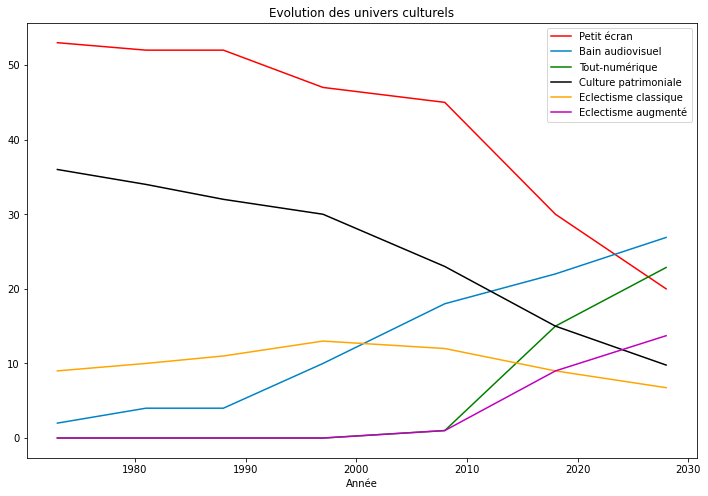

In [9]:
dpe = {'Univers' : ["Petit écran"], 'Année': [2028], 'Part' : [projection_2028_petit_ecran]}
df_pe = pd.DataFrame(dpe)
petit_ecran = petit_ecran.append(df_pe)

dba = {'Univers' : ["Bain audiovisuel"], 'Année': [2028], 'Part' : [projection_2028_bain_audiovisuel]}
df_ba = pd.DataFrame(dba)
bain_audiovisuel = bain_audiovisuel.append(df_ba)

dtn = {'Univers' : ["Tout-numérique"], 'Année': [2028], 'Part' : [Part2028_tout_numerique]}
df_tn = pd.DataFrame(dtn)
tout_numerique = tout_numerique.append(df_tn)

dcp = {'Univers' : ["Culture patrimoniale"], 'Année': [2028], 'Part' : [projection_2028_culture_patrimoniale]}
df_cp = pd.DataFrame(dcp)
culture_patrimoniale = culture_patrimoniale.append(df_cp)

dec = {'Univers' : ["Eclectisme classique"], 'Année': [2028], 'Part' : [projection_2028_eclectisme_classique]}
df_ec = pd.DataFrame(dec)
eclectisme_classique = eclectisme_classique.append(df_ec)

dea = {'Univers' : ["Eclectisme augmenté"], 'Année': [2028], 'Part' : [Part2028_eclectisme_augmente]}
df_ea = pd.DataFrame(dea)
eclectisme_augmente = eclectisme_augmente.append(df_ea)

fig , axs = plt.subplots(figsize=(12,8))
# Titre
plt.title("Evolution des univers culturels")
petit_ecran.plot(x='Année', y='Part', ax = axs, color = 'red', label = 'Petit écran' )
bain_audiovisuel.plot(x='Année', y='Part', ax = axs, color = '#0083c6', label = 'Bain audiovisuel')
tout_numerique.plot(x='Année', y='Part', ax = axs, color = 'green', label = 'Tout-numérique')
culture_patrimoniale.plot(x='Année', y='Part', ax = axs, color = 'black', label = 'Culture patrimoniale')
eclectisme_classique.plot(x='Année', y='Part', ax = axs, color = 'orange', label = 'Eclectisme classique')
eclectisme_augmente.plot(x='Année', y='Part', ax = axs, color = 'm', label = 'Eclectisme augmenté')
plt.show()

In [10]:
print("Part de visiteur potentiels des musées en 2028 : " +  str(int(projection_2028_eclectisme_classique+projection_2028_culture_patrimoniale+Part2028_eclectisme_augmente))+"% \nContre "+str(somme_visiteur_de_musee_par_annee[-1])+'% en 2018. La baisse continue.')

Part de visiteur potentiels des musées en 2028 : 30% 
Contre 33% en 2018. La baisse continue.


# Bilan :

Si rien n'arrive pour enrayer ce phénomène, les espaces d'expositions (tradionnels) risquent de perdre encore 3 points de prospects parmi la population française.

L'univers "Culture Patrimoniale" est d'ailleurs voué" à disparaître selon l'enquête du DEPS, sa population, en vieillissant, adhèrant finalement à un autre univers.

Il est capital de trouver un moyen de capter des publics éloignés pour inverser cette tendance à la décroissance de la part de français.e.s qui visitent des expositions.

### Petits souhaits pour la prochaine étude relatives aux pratiques culturelles en France : 
- Si la pratiques des expositions numériques se développe, je serais curieux de savoir dans quelle mesure.
- Je pense qu'il faudrait inclure le Rap dans la liste des types de concert. Il y a vraiment beaucoup d'amateurs et je suis sûr qu'ils se déclareront plus facilement s'ils se savent reconnus.
- Parmi les pratiques créatives, dans dix ans, j'espère qu'on verra l'écriture de code informatique. Après tout, cela revient à l'écriture d'une pensée dans un langage spécifique. D'ailleurs, comme toutes les pratiques créatives, ceux qui en font leur travail en font aussi un loisir. Ils et elles pratiquent pour le plaisir. Ils et elles s'accomplissent dans la création :

![Extrait rapport 2016 stackoverflow les codeurs codant durant leur temps libre](https://maximorose.eu/Ressources/Stack_Overflow_stats_2016.png)

Source : [Etudé du marché des recrutements des développeurs, Stack Overflow, 2016](www.zdnet.fr/i/edit/ne/2016/05/StackOverflow.pdf)